# UMAPs Neurips samples, NK cells

In this notebook differentially expressed genes between NK cell subsets are visualized. 

NK cell subsets were defined in notebook: Clustering_healthyBM_NK_neurips, where NK cells from all Neurips samples were selected for analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Neurips
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm_outer.h5ad')

In [3]:
#Select NK cells

adata_nk = adata[(adata.obs['cell_type'] == "NK") | (adata.obs['cell_type'] == "NK CD158e1+")] 
                            

In [4]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(adata_nk, use_rep="X_totalVI")   

sc.tl.umap(adata_nk)

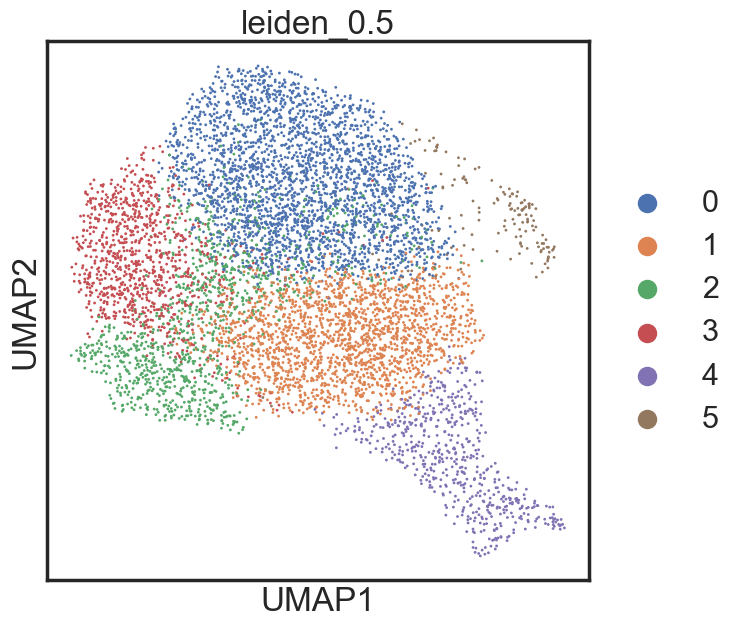

In [5]:
sns.set(style='white',  context='poster', rc={'figure.figsize':(7,7)})


sc.tl.leiden(adata_nk, resolution = 0.5, key_added = "leiden_0.5")

sc.pl.umap(adata_nk, color=['leiden_0.5'], ncols =1)

- cluster 3 contains mostly cells from one sample => cluster removed

In [6]:
adata_nk1 = adata_nk[(adata_nk.obs['leiden_0.5'] == "1") | (adata_nk.obs['leiden_0.5'] == "2")
                    | (adata_nk.obs['leiden_0.5'] == "4") | (adata_nk.obs['leiden_0.5'] == "5")
                     | (adata_nk.obs['leiden_0.5'] == "0")]
                    


In [7]:
adata_nk1.shape

(6404, 21720)

In [8]:
#Computing a neighborhood of observations using latent space

sc.pp.neighbors(adata_nk1, use_rep="X_totalVI")   

sc.tl.umap(adata_nk1)

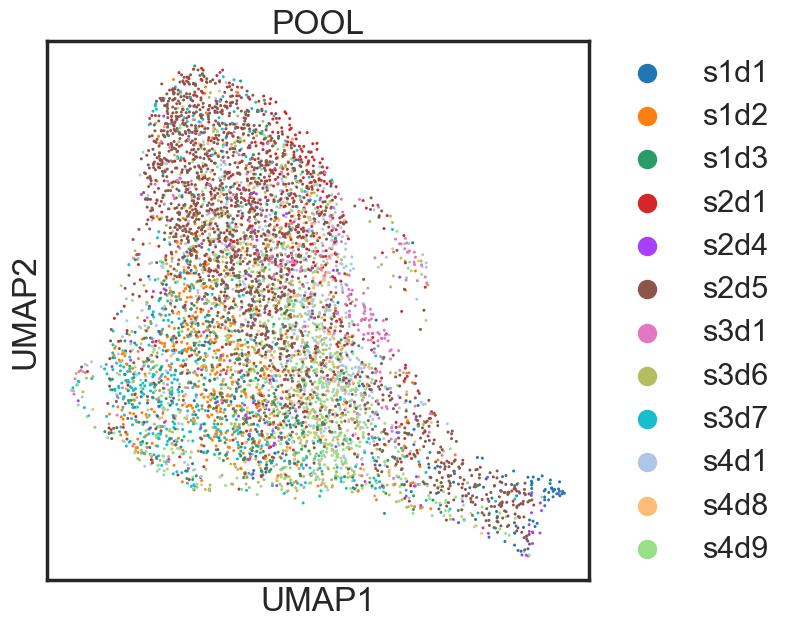

In [9]:
sc.pl.umap(adata_nk1, color = ['POOL'], color_map = 'viridis')

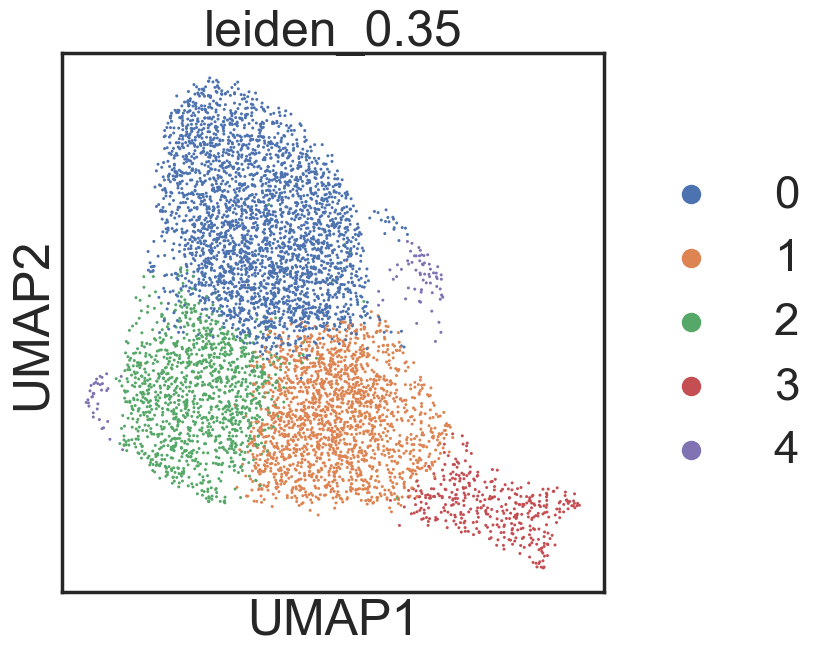

In [10]:
#Different leiden resolutions are 

sns.set(style='white', font_scale=1.5, context='poster', rc={'figure.figsize':(7,7)})


sc.tl.leiden(adata_nk1, resolution = 0.35, key_added = "leiden_0.35")

sc.pl.umap(adata_nk1, color=['leiden_0.35'], ncols =1)

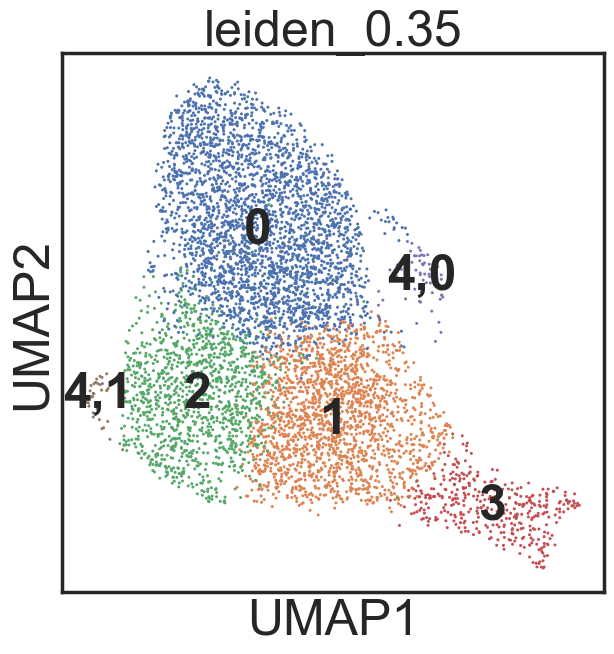

0      2913
1      1796
2      1214
3       384
4,0      64
4,1      33
Name: leiden_0.35, dtype: int64

In [11]:
#Cluster 4 further clustered

orig_key = 'leiden_0.35' 
new_key = 'leiden_0.35'
new_rg_key = 'rg_res0.35_sub'
sub_key = '4'

res = 0.2
sc.tl.leiden(adata_nk1, restrict_to=(orig_key, [sub_key]), key_added=new_key, resolution=res)
sc.pl.umap(adata_nk1, color=new_key, legend_loc = 'on data')
adata_nk1.obs[new_key].value_counts()

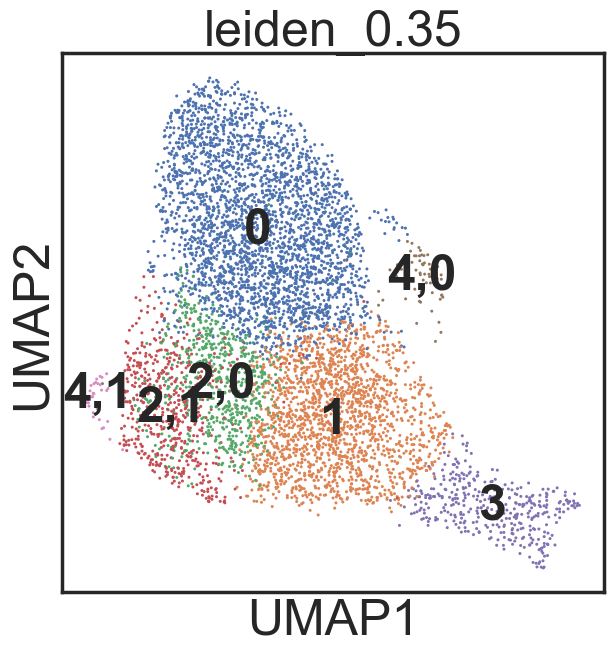

0      2913
1      1796
2,0     671
2,1     543
3       384
4,0      64
4,1      33
Name: leiden_0.35, dtype: int64

In [12]:
#cluster 2 further clustered 

orig_key = 'leiden_0.35' 
new_key = 'leiden_0.35'
new_rg_key = 'rg_res0.35_sub'
sub_key = '2'

res = 0.2
sc.tl.leiden(adata_nk1, restrict_to=(orig_key, [sub_key]), key_added=new_key, resolution=res)
sc.pl.umap(adata_nk1, color=new_key, legend_loc = 'on data')
adata_nk1.obs[new_key].value_counts()

In [13]:
#Removing MALAT1 and mito + ribo genes from adata_gex

#MALAT1 is more or less technical finding => remove

#malat1 = adata_gex.var_names.str.startswith('MALAT1')

sns.set(style='white', font_scale=1, context='poster', rc={'figure.figsize':(7,7)})

#genes to be removed
mito_genes = adata_nk1.var_names.str.startswith('MT-')
ribo_genes = adata_nk1.var_names.str.startswith('RPL')
ribo_genes1 = adata_nk1.var_names.str.startswith('RPS')

remove = np.add(mito_genes, ribo_genes)
remove = np.add(remove, ribo_genes1)

#other genes kept
keep = np.invert(remove)

adata_nk1 = adata_nk1[:,keep]

#print(adata_gex.n_obs, adata_gex.n_vars)

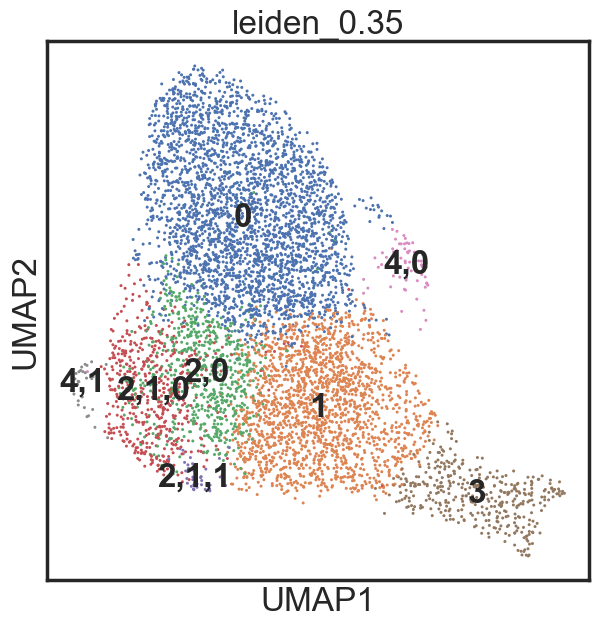

0        2913
1        1796
2,0       671
2,1,0     503
3         384
4,0        64
2,1,1      40
4,1        33
Name: leiden_0.35, dtype: int64

In [14]:
orig_key = 'leiden_0.35' 
new_key = 'leiden_0.35'
new_rg_key = 'rg_res0.35_sub'
sub_key = '2,1'

res = 0.2
sc.tl.leiden(adata_nk1, restrict_to=(orig_key, [sub_key]), key_added=new_key, resolution=res)
sc.pl.umap(adata_nk1, color=new_key, legend_loc = 'on data')
adata_nk1.obs[new_key].value_counts()

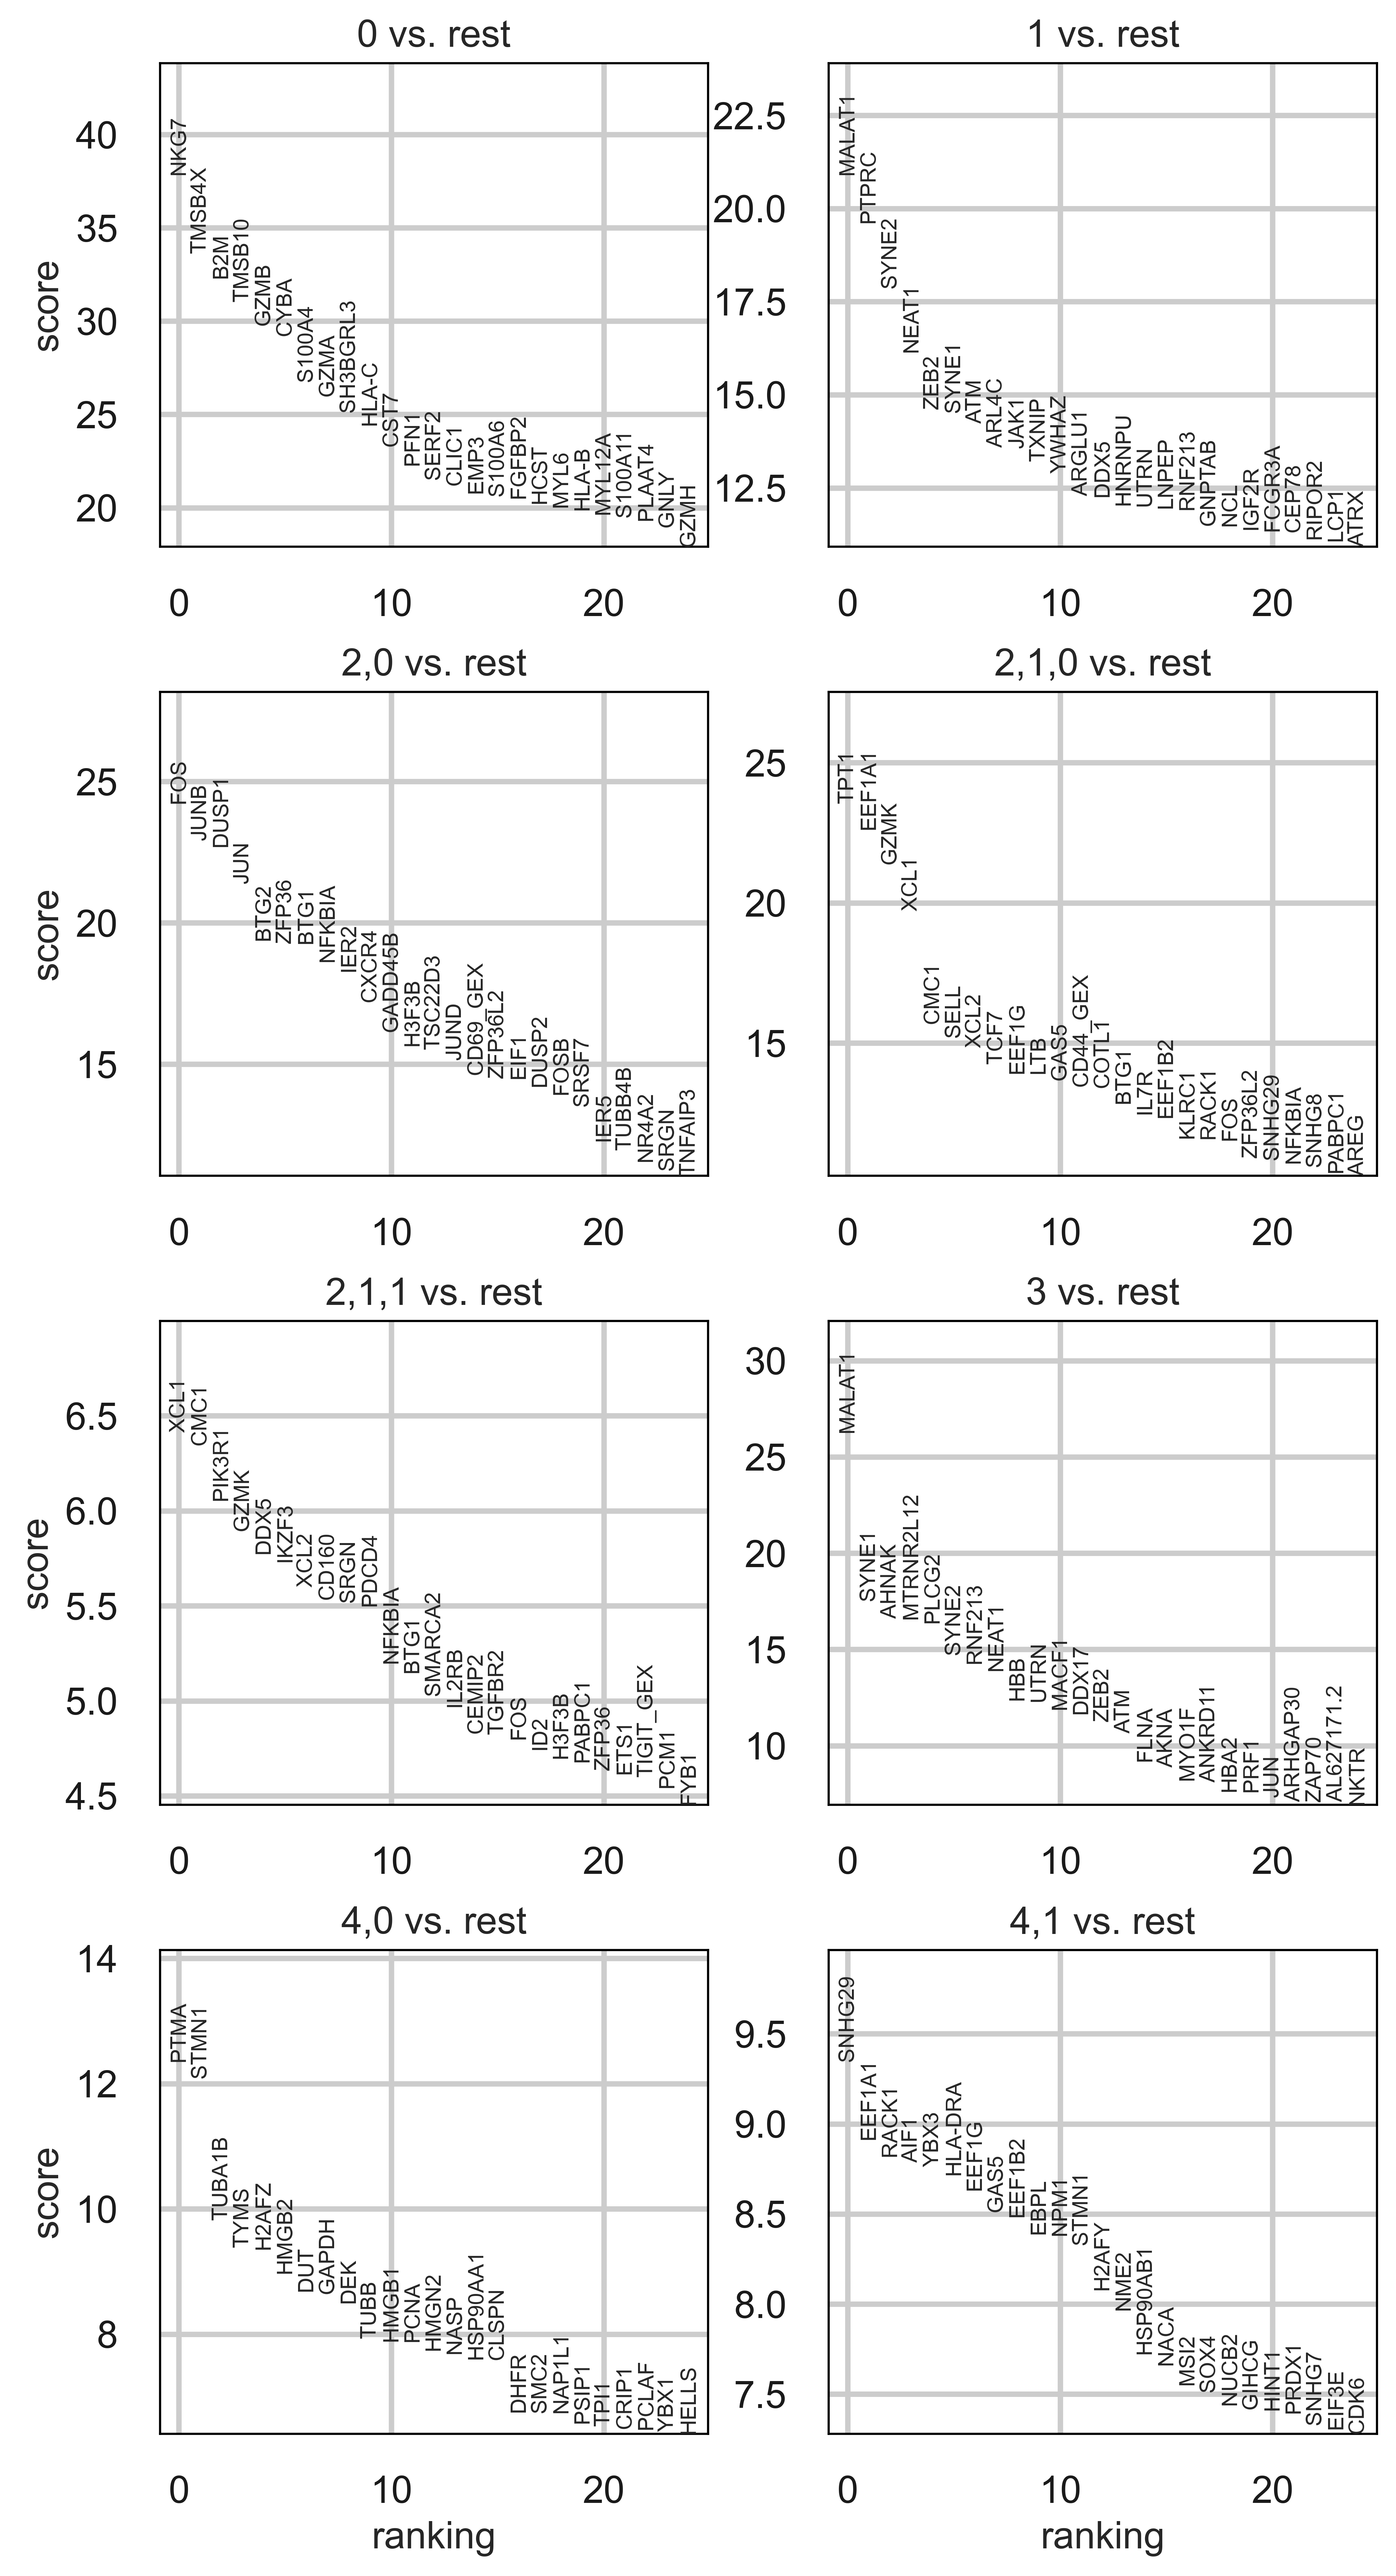

In [15]:
sc.settings.set_figure_params(dpi=300, dpi_save=400, vector_friendly=True)

sc.tl.rank_genes_groups(adata_nk1, 'leiden_0.35', method='wilcoxon')
sc.pl.rank_genes_groups(adata_nk1, n_genes=25, sharey=False, ncols=2)

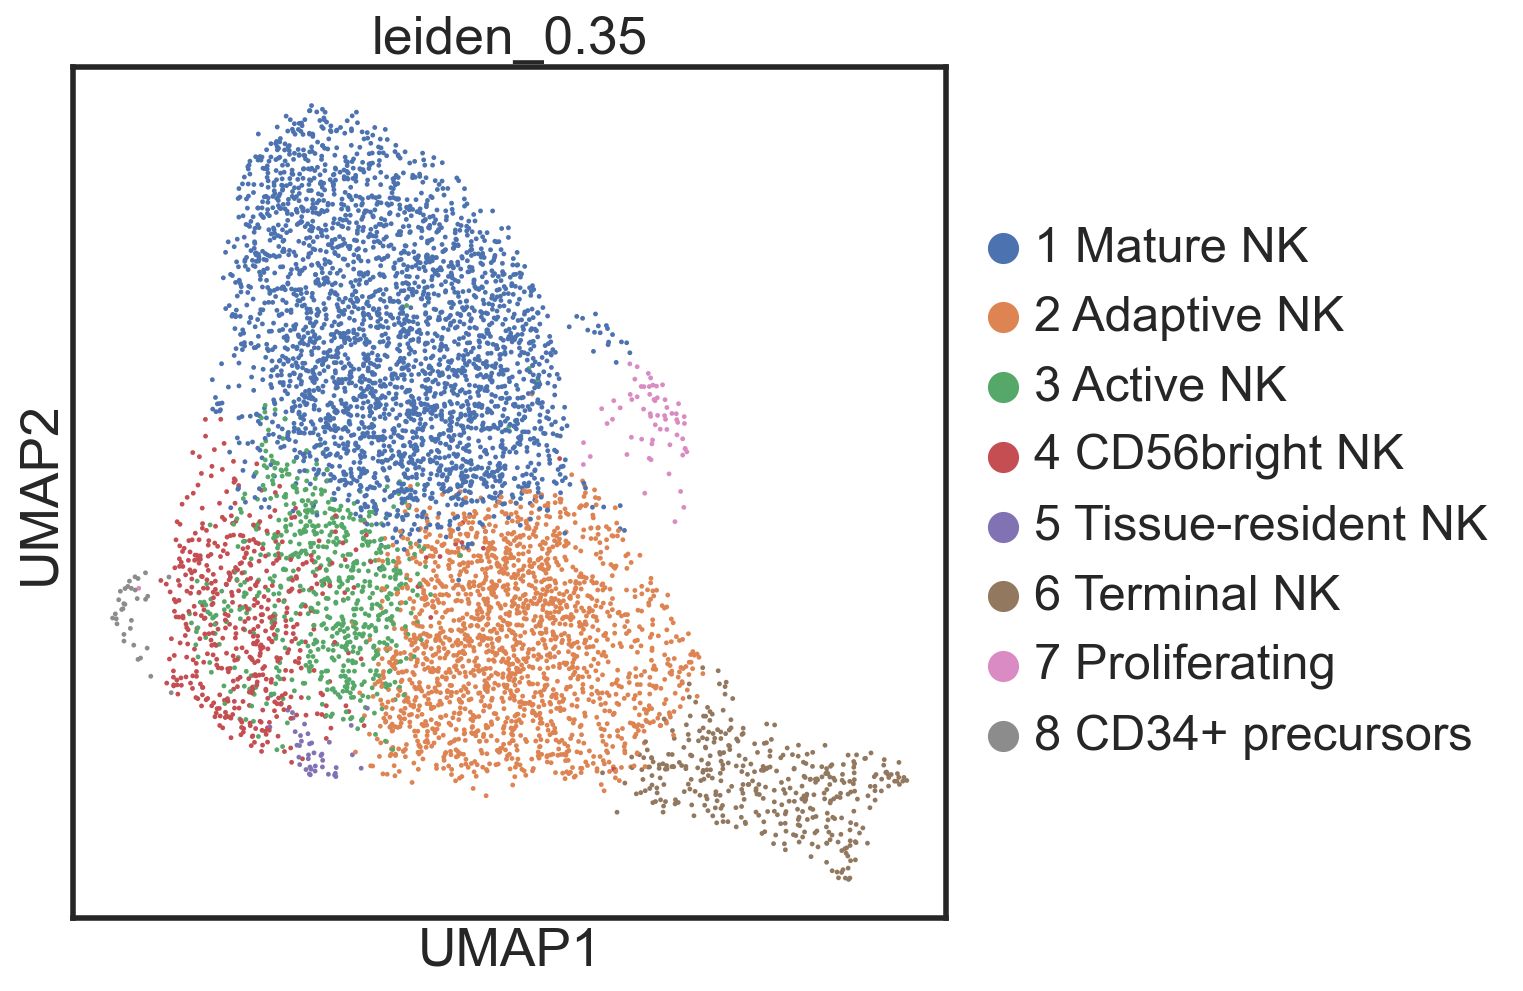

In [16]:
sc.set_figure_params(figsize=(7, 7))
new_cluster_names = [
    '1 Mature NK', '2 Adaptive NK',
    '3 Active NK', '4 CD56bright NK',
    '5 Tissue-resident NK', '6 Terminal NK', '7 Proliferating', '8 CD34+ precursors']

adata_nk1.rename_categories('leiden_0.35', new_cluster_names)

#Latent

sns.set(style='white', font_scale=1, context='poster', rc={'figure.figsize':(7,7)})

sc.pl.umap(adata_nk1, color=['leiden_0.35'])

In [27]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120, fontsize = 18, dpi_save=200, vector_friendly=True)

In [18]:
marker_genes = pd.Series()

for i in adata_nk1.obs['leiden_0.35'].cat.categories:
    marker_genes = marker_genes.append(sc.get.rank_genes_groups_df(adata_nk1, group=i, pval_cutoff=1e-4, log2fc_min=1)['names'][:5])
marker_genes = marker_genes.unique()

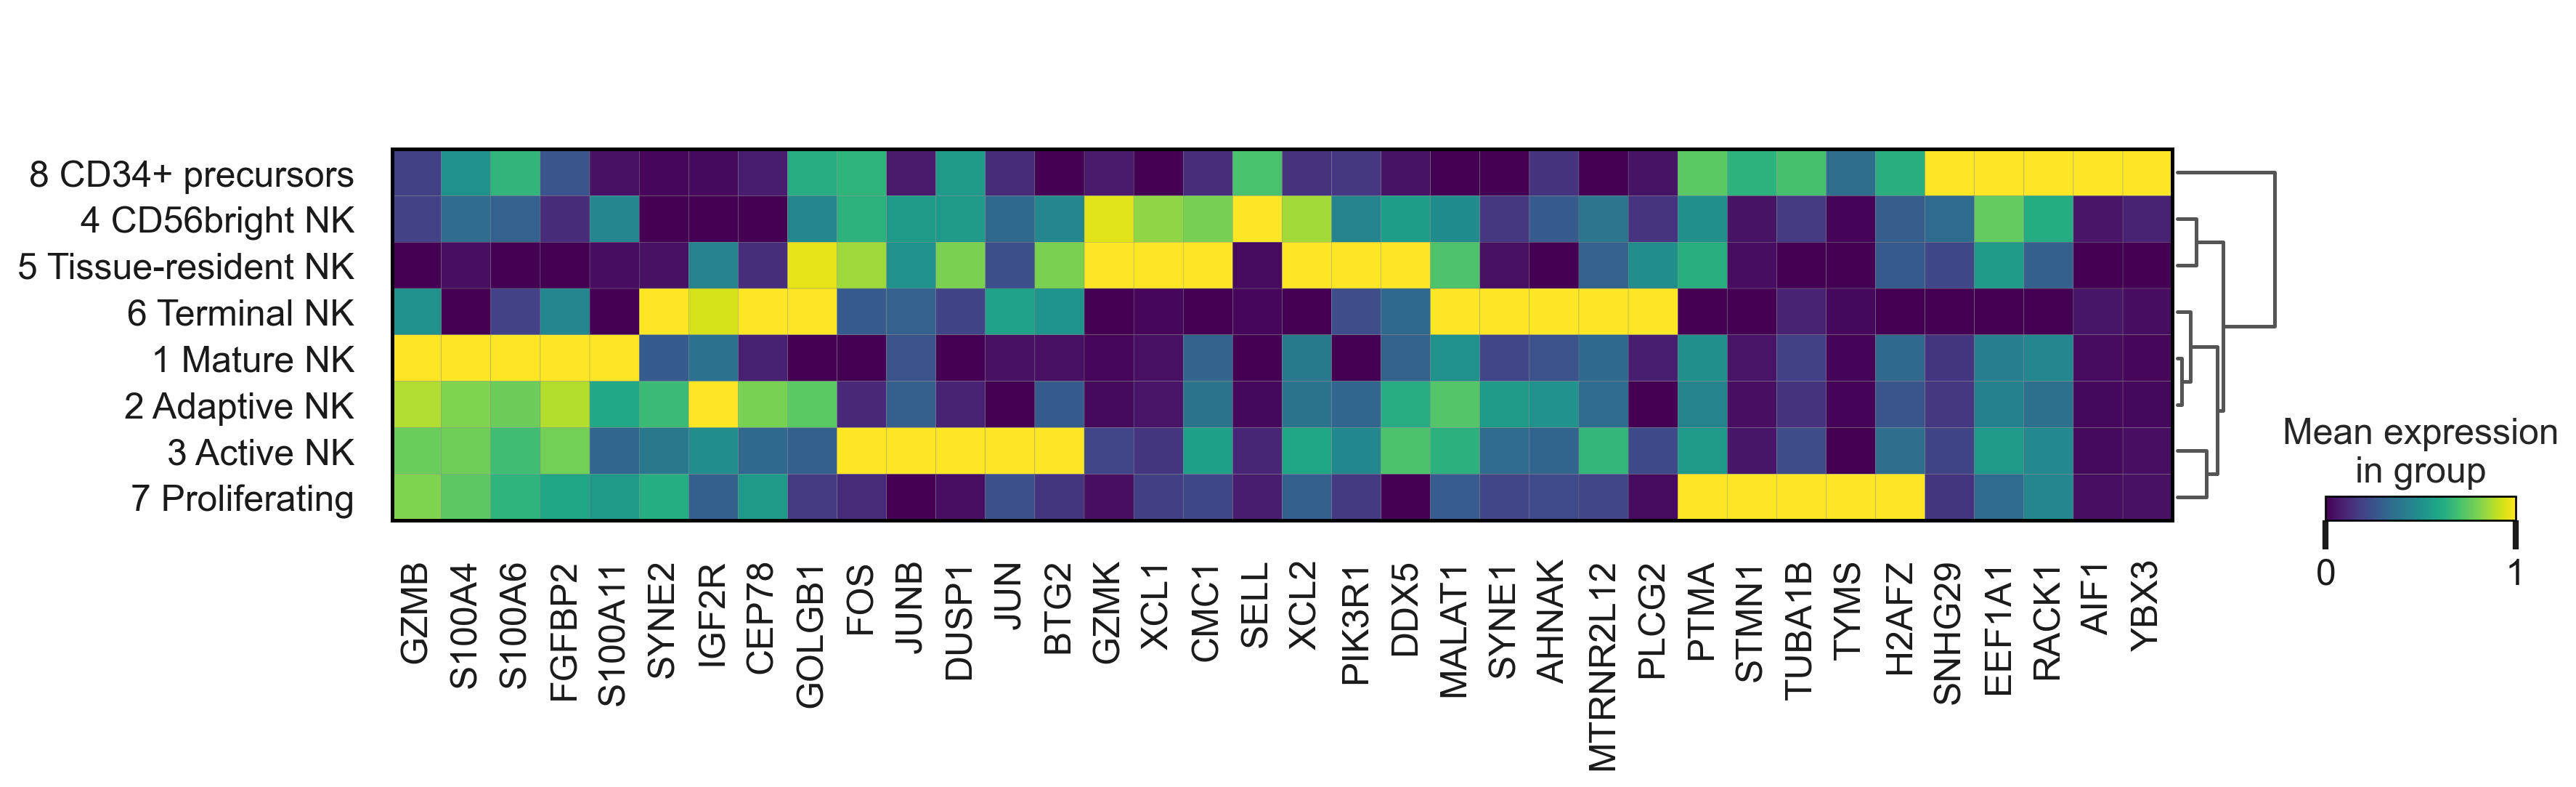

In [29]:
sc.pl.matrixplot(adata_nk1, var_names=marker_genes, groupby='leiden_0.35', standard_scale='var', dendrogram =True, var_group_labels='leiden_0.35')

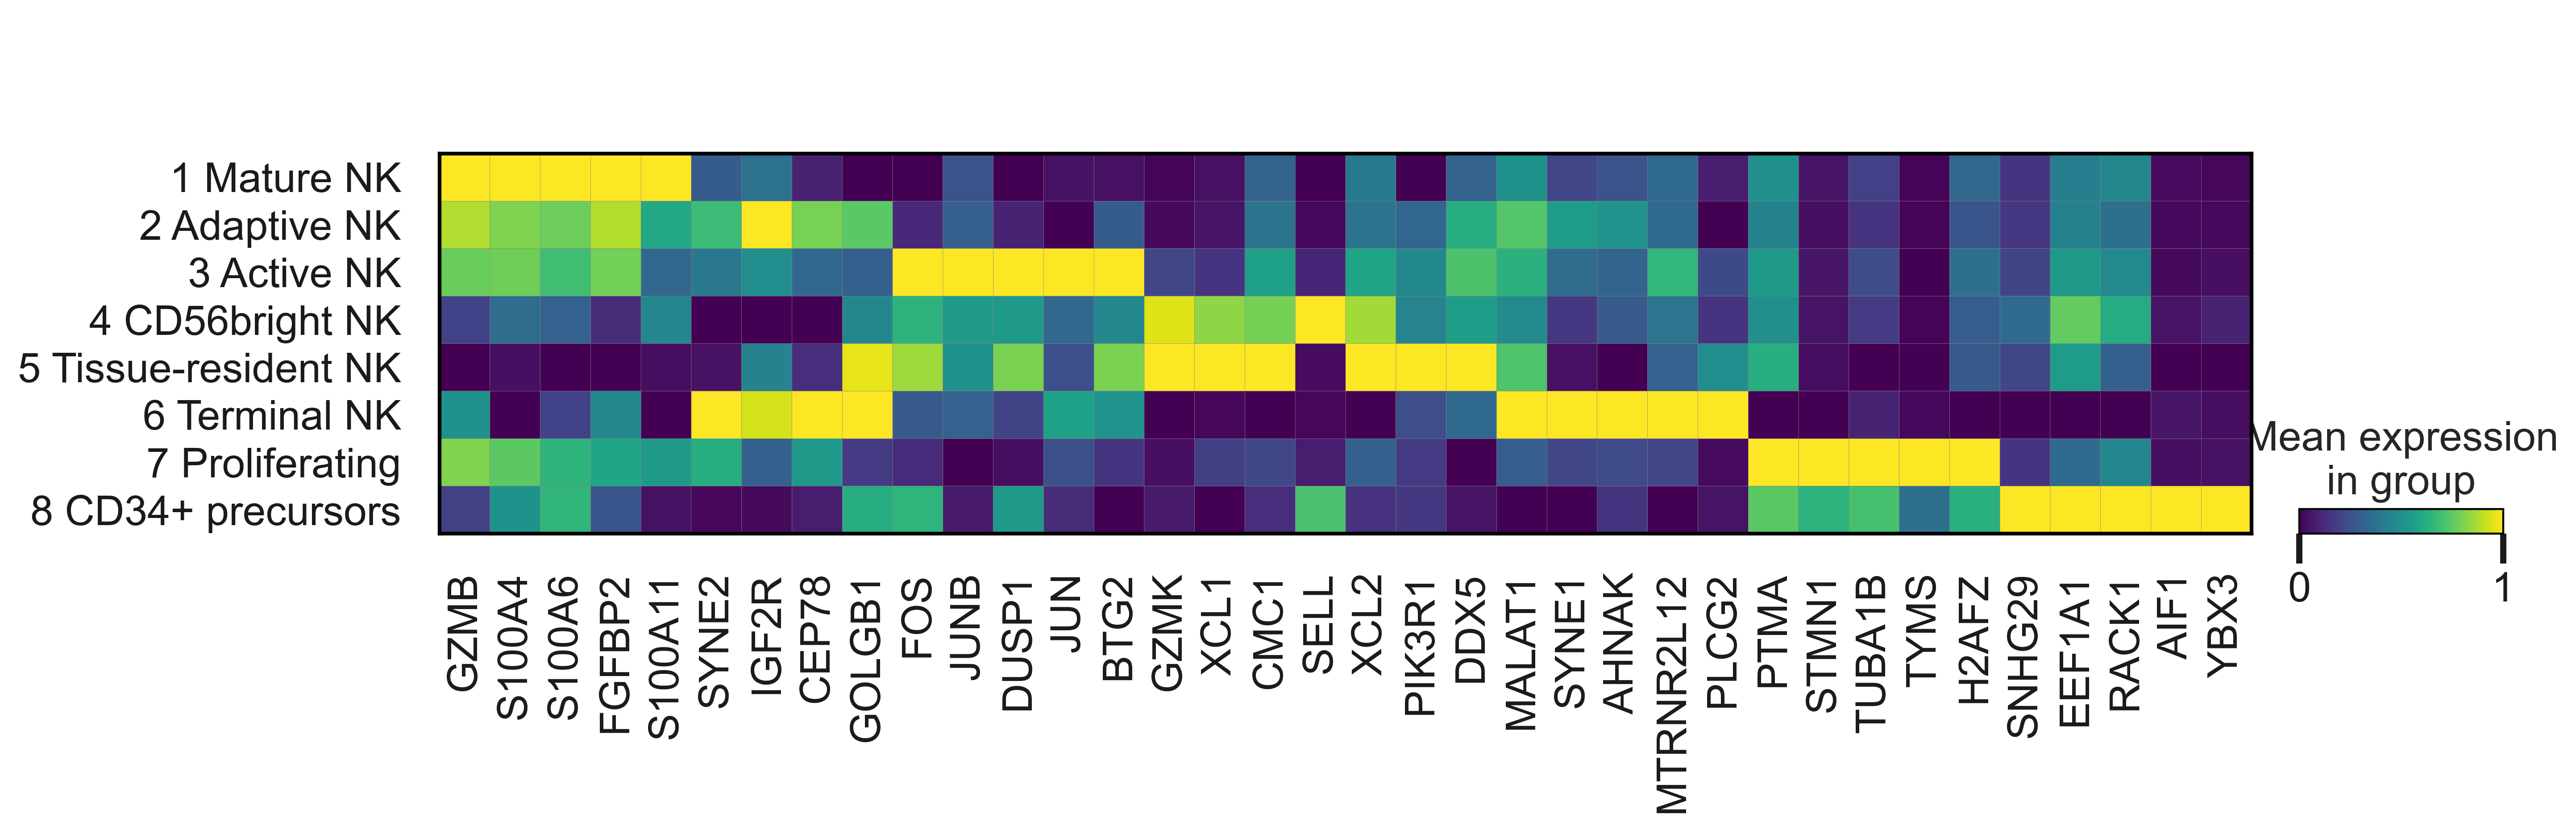

In [26]:
#sc.settings.set_figure_params(dpi=200, fontsize = 20, dpi_save=300)

sc.pl.matrixplot(adata_nk1, var_names=marker_genes,groupby='leiden_0.35', standard_scale='var', var_group_labels='leiden_0.35')


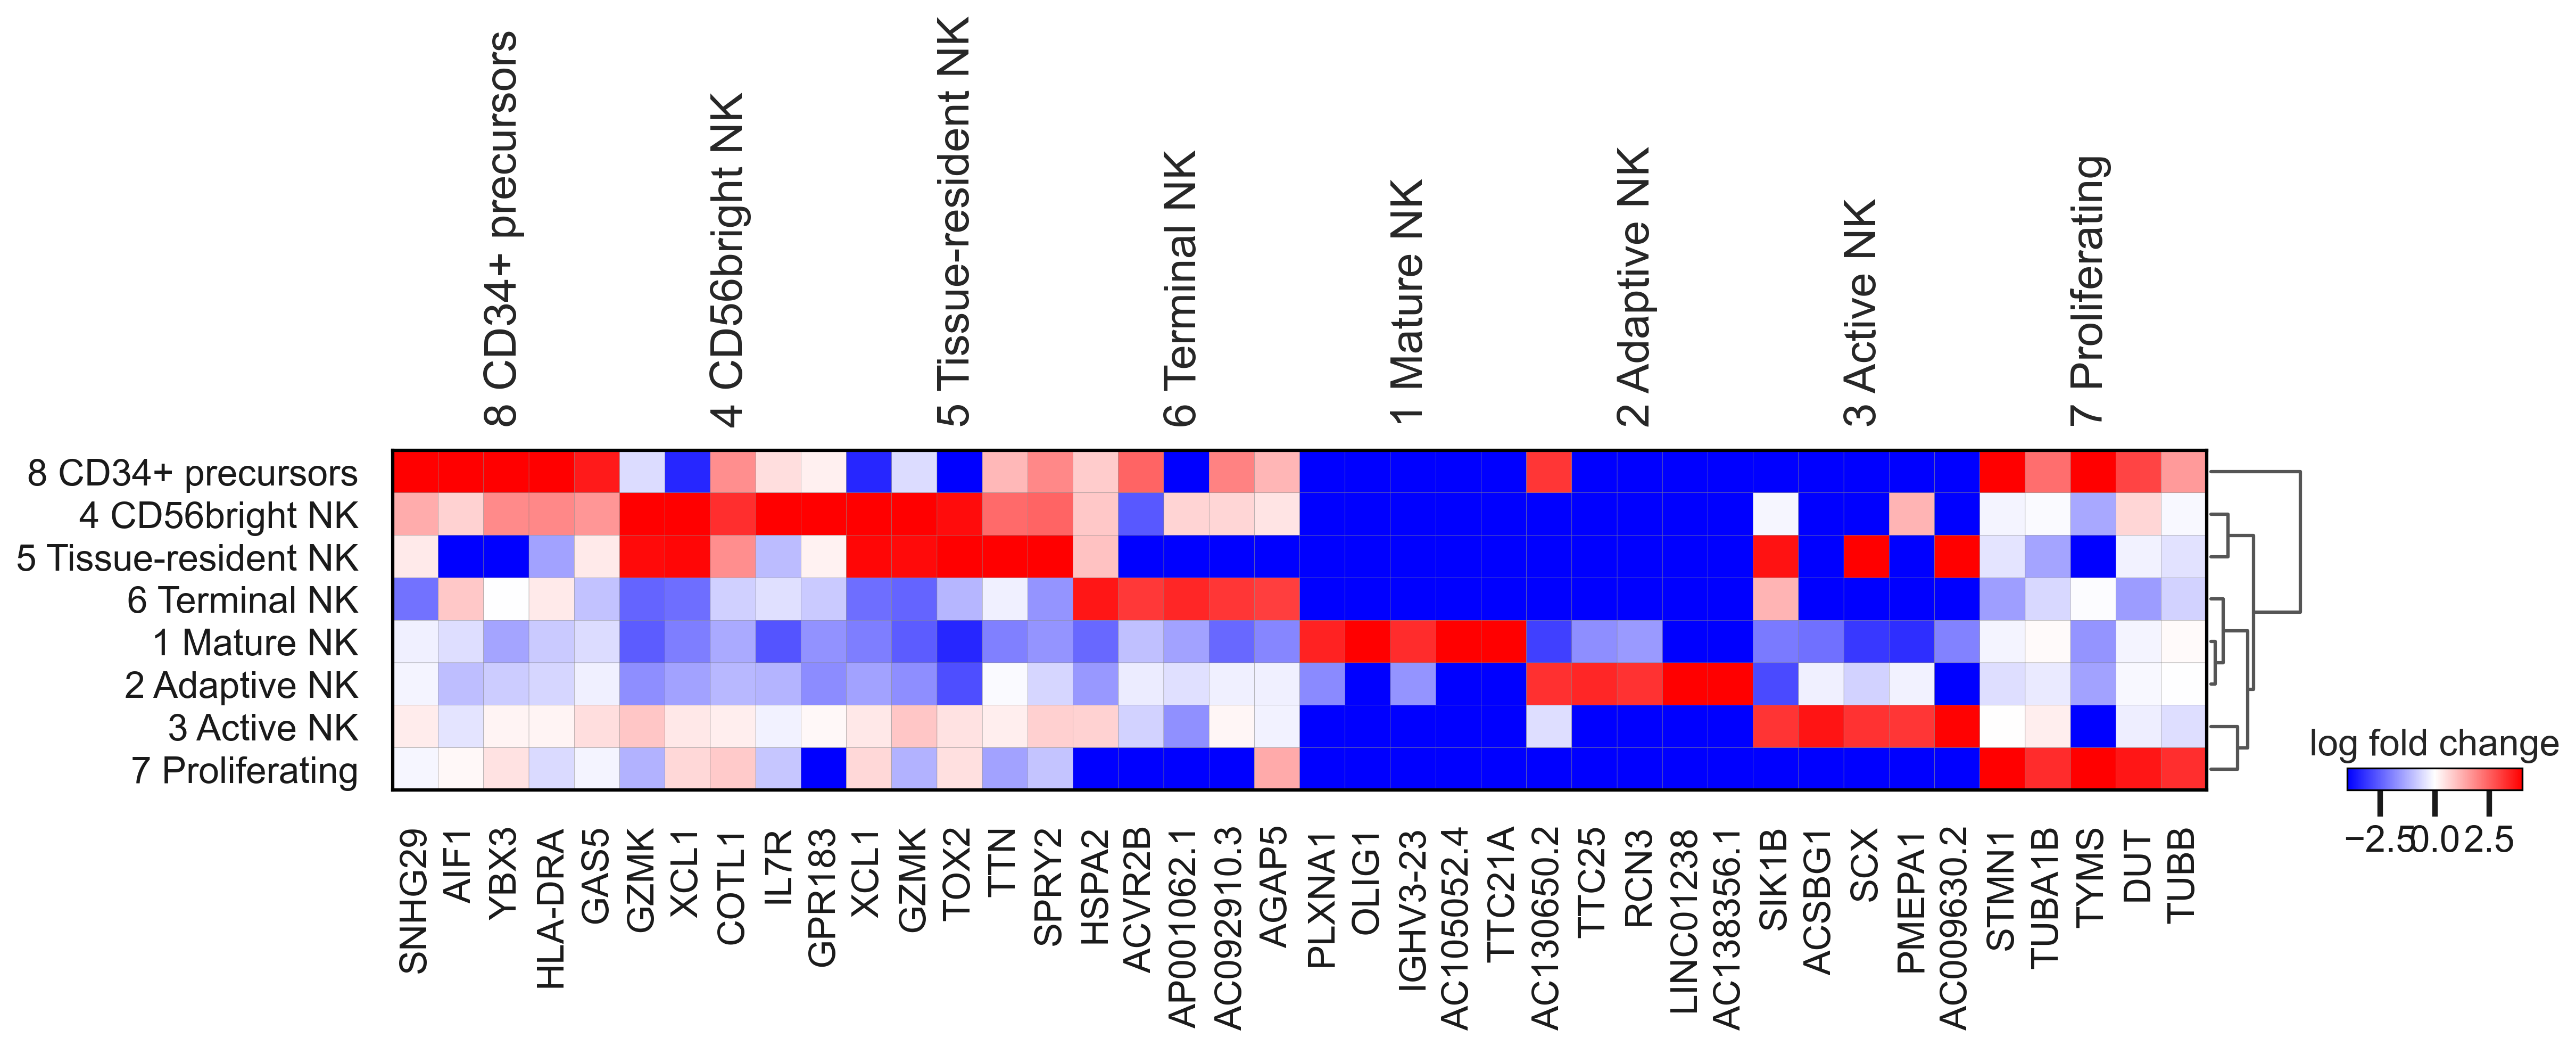

In [21]:
sc.pl.rank_genes_groups_matrixplot(
    adata_nk1,
    n_genes=5,
    values_to_plot="logfoldchanges",
    cmap='bwr',
    vmin=-4,
    vmax=4,
    min_logfoldchange=3,
    colorbar_title='log fold change',
)